In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Reading our Dataset**


In [2]:
#Reading the dataset for our customer churn
customer_churn = pd.read_csv('CustomerChurn_dataset.csv')

In [3]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Checking if our dataset has missing values
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Feature Engineering**

In [5]:
customer_churn.drop('customerID', inplace= True, axis= 1)

In [6]:
#Replacing spaces in the TotalCharges column with '0'
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].replace(" ", "0.00")

In [7]:
#Converting the TotalCharges column to float
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype("float")

In [8]:
#Seperating the object columns
cusChurn_obj_col = customer_churn.select_dtypes(include=['object'])

#Seperating the numeric columns
cusChurn_num_col = customer_churn.select_dtypes(include=['int', 'int64', 'float'])

In [9]:
cusChurn_obj_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
 15  Churn             7043 non-null   object
dtypes: object(16)
memory usage: 880.5+ KB


In [10]:
cusChurn_num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


**Scaling the numeric columns**

In [11]:
scaler = StandardScaler()

num_col_scaled = scaler.fit_transform(cusChurn_num_col)

# new DataFrame with the scaled features
cusChurn_num_col_scaled = pd.DataFrame(num_col_scaled, columns=cusChurn_num_col.columns)

In [12]:
cusChurn_num_col_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.992611
1,-0.439916,0.066327,-0.259629,-0.172165
2,-0.439916,-1.236724,-0.362660,-0.958066
3,-0.439916,0.514251,-0.746535,-0.193672
4,-0.439916,-1.236724,0.197365,-0.938874


**Label Enconding the Object columns**

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:

data_encoded = cusChurn_obj_col.copy()

for column in cusChurn_obj_col.columns:
    data_encoded[column] = le.fit_transform(cusChurn_obj_col[column])
    
data_encoded

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [15]:
cusChurn_obj_col_enc = data_encoded

In [16]:
cusChurn_obj_col_enc.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

**Dropping all 'NO' columns as the have the same information as the 'Yes' columns**

In [17]:
cusChurn_obj_col_enc.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


**Combining the refined data**

In [18]:
cus_ref_data = pd.concat([cusChurn_num_col_scaled, cusChurn_obj_col_enc] , axis= 1)

In [19]:
cus_ref_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   float64
 1   tenure            7043 non-null   float64
 2   MonthlyCharges    7043 non-null   float64
 3   TotalCharges      7043 non-null   float64
 4   gender            7043 non-null   int32  
 5   Partner           7043 non-null   int32  
 6   Dependents        7043 non-null   int32  
 7   PhoneService      7043 non-null   int32  
 8   MultipleLines     7043 non-null   int32  
 9   InternetService   7043 non-null   int32  
 10  OnlineSecurity    7043 non-null   int32  
 11  OnlineBackup      7043 non-null   int32  
 12  DeviceProtection  7043 non-null   int32  
 13  TechSupport       7043 non-null   int32  
 14  StreamingTV       7043 non-null   int32  
 15  StreamingMovies   7043 non-null   int32  
 16  Contract          7043 non-null   int32  


In [20]:
cus_ref_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-0.439916,-1.277445,-1.160323,-0.992611,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,-0.439916,0.066327,-0.259629,-0.172165,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,-0.439916,-1.236724,-0.362660,-0.958066,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,-0.439916,0.514251,-0.746535,-0.193672,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,-0.439916,-1.236724,0.197365,-0.938874,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


**Feature Selection**

In [21]:
cus_ref_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,-4.842546e-17,-2.421273e-17,-6.406285e-17,-3.783239e-17,0.504756,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,0.265370
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,0.500013,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.441561
min,-4.399165e-01,-1.318165e+00,-1.545860e+00,-1.005780e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.399165e-01,-9.516817e-01,-9.725399e-01,-8.299464e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-4.399165e-01,-1.372744e-01,1.857327e-01,-3.905282e-01,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
75%,-4.399165e-01,9.214551e-01,8.338335e-01,6.648034e-01,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,2.273159e+00,1.613701e+00,1.794352e+00,2.825806e+00,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


In [22]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [23]:
# Splitting the data into features (X) and target variable (y)

X = cus_ref_data.drop('Churn', axis=1)
y = cus_ref_data['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#Getting important features
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                  importance
TotalCharges        0.192732
MonthlyCharges      0.179371
tenure              0.157738
Contract            0.068358
OnlineSecurity      0.053927
PaymentMethod       0.052807
TechSupport         0.040734
gender              0.027158
OnlineBackup        0.026525
InternetService     0.026276
PaperlessBilling    0.026012
Partner             0.024244
MultipleLines       0.022487
DeviceProtection    0.022055
SeniorCitizen       0.020795
Dependents          0.019855
StreamingMovies     0.017313
StreamingTV         0.016105
PhoneService        0.005508


**Visualization**

In [25]:
#Visualization
import matplotlib.pyplot as plt

<Figure size 1000x2000 with 0 Axes>

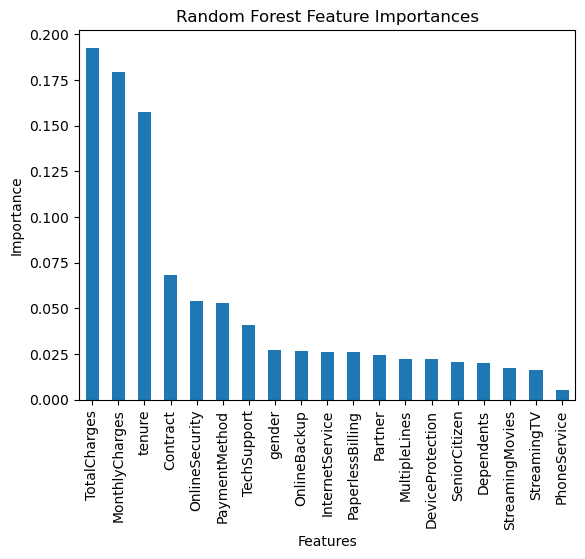

In [26]:
plt.figure(figsize=(10, 20))
feature_importances.plot(kind='bar', legend=False)
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**Feature Selection**

In [27]:
from sklearn.feature_selection import SelectFromModel

In [28]:
#Selecting important features using the model based on feature importance

sfm = SelectFromModel(rf, threshold=0.025)  
sfm.fit(X_train, y_train)

selected_features = X_train.columns[sfm.get_support()]
print(selected_features)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'Partner',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [29]:
#Performing cross validation to evaluate the model's performance
from sklearn.model_selection import cross_val_score

In [30]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # You can use different scoring metrics


print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

#Thresholds: 0.015

Cross-Validation Scores: [0.79418027 0.79276082 0.77430802 0.79616477 0.79616477]
Mean Accuracy: 0.790715731660107


In [31]:
selected_features.value_counts()

tenure              1
MonthlyCharges      1
TotalCharges        1
gender              1
Partner             1
InternetService     1
OnlineSecurity      1
OnlineBackup        1
TechSupport         1
Contract            1
PaperlessBilling    1
PaymentMethod       1
Name: count, dtype: int64

In [32]:
cus_Churn_data = pd.concat([cus_ref_data[selected_features], cus_ref_data['Churn']], axis= 1)

In [33]:
cus_Churn_data.head()

,tenure,MonthlyCharges,TotalCharges,gender,Partner,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.277445,-1.160323,-0.992611,0,1,0,0,2,0,0,1,2,0
1,0.066327,-0.259629,-0.172165,1,0,0,2,0,0,1,0,3,0
2,-1.236724,-0.362660,-0.958066,1,0,0,2,2,0,0,1,3,1
3,0.514251,-0.746535,-0.193672,1,0,0,2,0,2,1,0,0,0
4,-1.236724,0.197365,-0.938874,0,0,1,0,0,0,0,1,2,1


In [34]:

X = cus_Churn_data[selected_features]
y = cus_Churn_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training using ANN**

In [35]:
from keras.models import Model
from keras.layers import Input, Dense
from scikeras.wrappers import KerasClassifier

In [36]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [37]:
import keras
import sklearn
import scikeras

In [38]:
X, y = make_classification(n_samples=1000, n_features= len(selected_features), n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
def create_ann_model(neurons=64, activation='relu', optimizer='adam'):
    inputs = Input(shape=(len(selected_features),))
    x = Dense(neurons, activation=activation)(inputs)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [40]:
from sklearn.model_selection import GridSearchCV

**Training with grid search, using Keras Classifier**

In [41]:
#{'activation': 'relu', 'batch_size': 20, 'epochs': 5, 'neurons': 128, 'optimizer': 'rmsprop'}

param = {
    'neurons': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [5, 20, 50],
    'batch_size': [10, 20, 30]
}

In [42]:
model = KerasClassifier( activation= param['activation'], neurons= param['neurons'], optimizer= param['optimizer'], build_fn=create_ann_model, epochs= param['epochs'], batch_size= param['batch_size'], verbose=True)

In [43]:
grid_search = GridSearchCV(estimator=model, param_grid=param, scoring='accuracy', cv=3, n_jobs= -1)
grid_result = grid_search.fit(X_train, y_train)


c:\Users\twist\anaconda3\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
80/80 [==============================] - 2s 2ms/step - loss: 0.4705 - accuracy: 0.8000
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 0.3239 - accuracy: 0.8725
Epoch 3/5
80/80 [==============================] - 0s 2ms/step - loss: 0.3024 - accuracy: 0.8788
Epoch 4/5
80/80 [==============================] - 0s 2ms/step - loss: 0.2953 - accuracy: 0.8775
Epoch 5/5
80/80 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.8838


In [73]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.874973 using {'activation': 'relu', 'batch_size': 10, 'epochs': 5, 'neurons': 128, 'optimizer': 'rmsprop'}


In [74]:
best_params = grid_result.best_params_

In [75]:
best_neuron = best_params['neurons']
best_activation = best_params['activation']
best_optimizer = best_params['optimizer']
best_epoch = best_params['epochs']
best_batch_size = best_params['batch_size']

In [76]:

inputs = Input(shape=(len(selected_features),))
first_layer = Dense(best_neuron, activation=best_activation)(inputs)
second_layer = Dense(32, activation='relu')(first_layer)
outputs = Dense(1, activation='sigmoid')(second_layer)
keras_model = Model(inputs=inputs, outputs=outputs)
keras_model.compile(optimizer=best_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
keras_model.fit(X_train, y_train, validation_data= (X_test, y_test))

25/25 [==============================] - 3s 21ms/step - loss: 0.4761 - accuracy: 0.8250 - val_loss: 0.4015 - val_accuracy: 0.8350


In [80]:
#y_pred_proba = keras_model.predict_proba(X_test)  
#y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)  

In [81]:
#Checking accuracy score of the model
from sklearn.metrics import accuracy_score

In [82]:
#Calculating AUC Score
from sklearn.metrics import roc_auc_score

In [83]:
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])


In [84]:
print(f"Prediction Accuracy: {accuracy:.4f}")
print(f"Prediction AUC Score: {auc_score:.4f}")

Prediction Accuracy: 0.8500
Prediction AUC Score: 0.9241


**Saving the model for deployment**

In [96]:
import pickle
import joblib

In [97]:
#Saving the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [98]:
#Saving the label_encoder to a file
joblib.dump(le, 'label_encoder.joblib')

['label_encoder.joblib']

In [99]:
print(keras_model)

In [100]:
#Saving the model Keras_Model
keras_model.save("Keras_Model.h5")